In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import tensorflow as tf
import numpy as np
import random
import pandas as pd
import csv
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import os

path = "/content/drive/My Drive"

os.chdir(path)
os.listdir(path)

annotations = pd.read_csv('/content/drive/My Drive/train_annotations.csv')
df = pd.DataFrame({'file_name': [],'width': [],'height': [],'category':[]})

['057_0001.png', '057_0002.png', '057_0003_j.png', '057_1_0001.png', '057_1_0002.png', '057_1_0003_1_j.png']
{'0': 118, '1': 40, '2': 80, '3': 260, '4': 98, '5': 194, '6': 78, '7': 152, '8': 8, '9': 2, '10': 70, '11': 138, '12': 96, '13': 36, '14': 128, '15': 22, '16': 142, '17': 130, '18': 8, '19': 4, '20': 18, '21': 12, '22': 18, '23': 14, '24': 100, '25': 2, '26': 126, '27': 28, '28': 446, '29': 44, '30': 150, '31': 42, '32': 14, '33': 4, '34': 26, '35': 156, '36': 40, '37': 58, '38': 30, '39': 34, '40': 32, '41': 18, '42': 32, '43': 82, '44': 30, '45': 24, '46': 18, '47': 12, '48': 10, '49': 42, '50': 56, '51': 8, '52': 36, '53': 2, '54': 324, '55': 162, '56': 110, '57': 6}
total number 4170
average should be 71.89655172413794


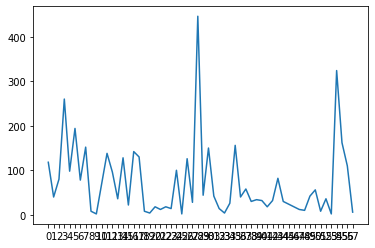

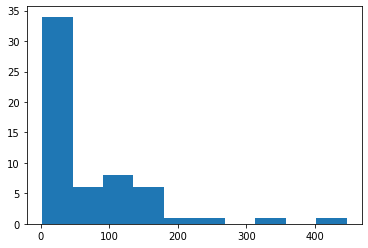

In [0]:
label = []
label_image_d = {'0':[], '1':[], '2':[], '3':[], '4':[], '5':[], '6':[], '7':[], '8':[], '9':[], '10':[],
                 '11':[], '12':[], '13':[], '14':[], '15':[], '16':[], '17':[], '18':[], '19':[], '20':[],
                 '21':[], '22':[], '23':[], '24':[], '25':[], '26':[], '27':[], '28':[], '29':[], '30':[],
                 '31':[], '32':[], '33':[], '34':[], '35':[], '36':[], '37':[], '38':[], '39':[], '40':[],
                 '41':[], '42':[], '43':[], '44':[], '45':[], '46':[], '47':[], '48':[], '49':[], '50':[],
                 '51':[], '52':[], '53':[], '54':[], '55':[], '56':[], '57':[]}
d = {}

with open('/content/drive/My Drive/TsignRecgTrain4170Annotation.txt','r') as f:
  for i in f:
    i = i.strip().split(';')
    label.append(i[-2])
    filename = i[0]
    d[i[-2]] = d.get(i[-2],0) + 1
    label_image_d[i[-2]].append(filename)
f.close()

print(label_image_d['57']) # label:image_filename pairs
print(d) # label:number of images of this labal

print('total number', len(label))
print('average should be', len(label)/58)

# for k,v in d.items():
#   if v < average:
#     print(k)

labels = list(d.keys())
frequency = list(d.values())
plt.plot(labels, frequency)
plt.show()

plt.hist(frequency)
plt.show()

In [0]:
ideal_average = (3*len(label))//58
dic = {}
print(ideal_average)
for k,v in d.items():
  print('label:',k,'already have:', d[str(k)], 'should add:', ideal_average-v)
  dic[k] = ideal_average-v

215
label: 0 already have: 118 should add: 97
label: 1 already have: 40 should add: 175
label: 2 already have: 80 should add: 135
label: 3 already have: 260 should add: -45
label: 4 already have: 98 should add: 117
label: 5 already have: 194 should add: 21
label: 6 already have: 78 should add: 137
label: 7 already have: 152 should add: 63
label: 8 already have: 8 should add: 207
label: 9 already have: 2 should add: 213
label: 10 already have: 70 should add: 145
label: 11 already have: 138 should add: 77
label: 12 already have: 96 should add: 119
label: 13 already have: 36 should add: 179
label: 14 already have: 128 should add: 87
label: 15 already have: 22 should add: 193
label: 16 already have: 142 should add: 73
label: 17 already have: 130 should add: 85
label: 18 already have: 8 should add: 207
label: 19 already have: 4 should add: 211
label: 20 already have: 18 should add: 197
label: 21 already have: 12 should add: 203
label: 22 already have: 18 should add: 197
label: 23 already ha

In [0]:
def one_image_to_array(filename):
    img = tf.io.read_file('/content/drive/My Drive/tsrd-train/'+filename)
    return np.array(tf.image.decode_png(img, channels=3))

In [0]:
def output_saturation(image, outname, original_category):
    global df
    saturation_degree = random.uniform(0.0001,3)
    augmented = tf.image.adjust_saturation(image, saturation_degree)
    output_image = tf.cast(augmented, dtype=tf.uint8)
    out = tf.image.encode_png(output_image)
    with tf.io.gfile.GFile(outname, 'wb') as file:
        file.write(out.numpy())
    new_row = {'file_name':outname, 'width':augmented.shape[0], 'height':augmented.shape[1], 'category':original_category}
    df = df.append(new_row, ignore_index=True)

In [0]:
def output_flipped(image, outname, original_category):
    global df
    augmented = tf.image.flip_left_right(image)
    output_image = tf.cast(augmented, dtype=tf.uint8)
    out = tf.image.encode_png(output_image)
    with tf.io.gfile.GFile(outname, 'wb') as file:
        file.write(out.numpy())
    new_row = {'file_name':outname, 'width':augmented.shape[0], 'height':augmented.shape[1], 'category':original_category}
    df = df.append(new_row, ignore_index=True)

In [0]:
def output_brightness(image, outname, original_category):
    global df
    brightness_degree = random.uniform(0.0001,0.4)
    augmented = tf.image.adjust_brightness(image, brightness_degree)
    output_image = tf.cast(augmented, dtype=tf.uint8)
    out = tf.image.encode_png(output_image)
    with tf.io.gfile.GFile(outname, 'wb') as file:
        file.write(out.numpy())
    new_row = {'file_name':outname, 'width':augmented.shape[0], 'height':augmented.shape[1], 'category':original_category}
    df = df.append(new_row, ignore_index=True)

In [0]:
def output_rotation(image, outname, original_category):
    global df
    augmented = tf.keras.preprocessing.image.random_rotation(image, 30, row_axis=0, col_axis=1, channel_axis=2)
    output_image = tf.cast(augmented, dtype=tf.uint8)
    out = tf.image.encode_png(output_image)
    with tf.io.gfile.GFile(outname, 'wb') as file:
        file.write(out.numpy())
    new_row = {'file_name':outname, 'width':augmented.shape[0], 'height':augmented.shape[1], 'category':original_category}
    df = df.append(new_row, ignore_index=True)

In [0]:
def output_shift(image, outname, original_category):
    global df
    augmented = tf.keras.preprocessing.image.random_shift(image, 0.2, 0.2, row_axis=0, col_axis=1, channel_axis=2)
    output_image = tf.cast(augmented, dtype=tf.uint8)
    out = tf.image.encode_png(output_image)
    with tf.io.gfile.GFile(outname, 'wb') as file:
        file.write(out.numpy())
    new_row = {'file_name':outname, 'width':augmented.shape[0], 'height':augmented.shape[1], 'category':original_category}
    df = df.append(new_row, ignore_index=True)

In [0]:
def output_crop(image, outname, original_category):
    global df
    crop_degree = random.uniform(0.75,1)
    augmented = tf.image.central_crop(image, central_fraction=crop_degree)
    output_image = tf.cast(augmented, dtype=tf.uint8)
    out = tf.image.encode_png(output_image)
    with tf.io.gfile.GFile(outname, 'wb') as file:
        file.write(out.numpy())
    new_row = {'file_name':outname, 'width':augmented.shape[0], 'height':augmented.shape[1], 'category':original_category}
    df = df.append(new_row, ignore_index=True)

In [0]:
# image_filename = '000_1_0001.png'
# image_array = one_image_to_array(image_filename)
# annotations = pd.read_csv('annotations.csv')
# original_category = int(annotations.loc[annotations['file_name']==image_filename, 'category'].item())
# output_saturation(image_array, 'aug/out.png', original_category)
# # output_flipped(image_array, 'aug/out2.png', original_category)
# output_brightness(image_array, 'aug/out3.png', original_category)
# output_rotation(image_array, 'aug/out4.png', original_category)
# output_shift(image_array, 'aug/out5.png', original_category)
# output_crop(image_array, 'aug/out6.png', original_category)

# df.to_csv('aug_annotations.csv', index = False)

In [0]:
def augment_one_image(image_filename, original_category, i):
    image_array = one_image_to_array(image_filename)
    # output_saturation(image_array, 's'+str(i)+'_'+image_filename, original_category)
    # output_flipped(image_array, 'f'+str(i)+'_'+image_filename, original_category)
    output_brightness(image_array, 'b'+str(i)+'_'+image_filename, original_category)
    output_rotation(image_array, 'r'+str(i)+'_'+image_filename, original_category)
    output_shift(image_array, 'sh'+str(i)+'_'+image_filename, original_category)
    output_crop(image_array, 'c'+str(i)+'_'+image_filename, original_category)

In [0]:
def augment_one_category(original_category, n):
    category_image_filename_list = list(label_image_d[original_category])
    original_number_images = d[original_category]
    for i in range(n//4+1):  #need to change the number '4' according to the number of augmentation methods you use
      image_filename = category_image_filename_list[i % original_number_images]
      augment_one_image(image_filename, original_category, i)

In [0]:
def copy_one_image(image_filename, outname, original_category):
    global df
    image_array = one_image_to_array(image_filename)
    print(image_filename)
    print(image_array.shape)
    print(annotations.loc[annotations['file_name']==image_filename])
    x1 = int(annotations.loc[annotations['file_name']==image_filename, 'x1'].item())
    y1 = int(annotations.loc[annotations['file_name']==image_filename, 'y1'].item())
    x2 = int(annotations.loc[annotations['file_name']==image_filename, 'x2'].item())
    y2 = int(annotations.loc[annotations['file_name']==image_filename, 'y2'].item())
    print(x1,x2,y1,y2)   
    copied = tf.image.crop_to_bounding_box(image_array, y1, x1, y2-y1, x2-x1)
    output_image = tf.cast(copied, dtype=tf.uint8)
    out = tf.image.encode_png(output_image)
    with tf.io.gfile.GFile(outname, 'wb') as file:
        file.write(out.numpy())
    new_row = {'file_name':outname, 'width':copied.shape[0], 'height':copied.shape[1], 'category':original_category}
    df = df.append(new_row, ignore_index=True)

In [0]:
def undersample_one_category(original_category, n):
    category_image_filename_list = list(label_image_d[original_category])
    sampled_image_filenames = random.sample(category_image_filename_list, n)
    for image_filename in sampled_image_filenames:
        copy_one_image(image_filename, 'c_'+image_filename, original_category)

In [0]:
def copy_one_category(original_category):
    category_image_filename_list = list(label_image_d[original_category])
    for image_filename in category_image_filename_list:
        outname = 'c_'+image_filename
        copy_one_image(image_filename, outname, original_category)

In [0]:
# augment_one_category('25', dic['25'])
# df.to_csv('aug_annotations.csv', index = False)

In [0]:
def augment_all():
    for category in list(label_image_d.keys()):
        if dic[category] >= 0:
            augment_one_category(category, dic[category])
            copy_one_category(category)
        else:
            undersample_one_category(category, ideal_average)
    df.to_csv('aug_annotations.csv', index = False)

In [0]:
augment_all() #finish data cleaning, dara augmentation and deal with the inbalanced data

Streaming output truncated to the last 5000 lines.
(197, 212, 3)
        file_name  width  height  x1  y1   x2   y2  category
755  037_0018.png    212     197  29  33  183  171        37
29 183 33 171
037_0024.png
(126, 141, 3)
        file_name  width  height  x1  y1   x2   y2  category
756  037_0024.png    141     126  20  20  114  103        37
20 114 20 103
037_0006_j.png
(115, 121, 3)
          file_name  width  height  x1  y1  x2  y2  category
757  037_0006_j.png    121     115  24  28  88  87        37
24 88 28 87
037_0014_j.png
(106, 102, 3)
          file_name  width  height  x1  y1  x2  y2  category
758  037_0014_j.png    102     106  19  20  79  83        37
19 79 20 83
037_0016_j.png
(107, 104, 3)
           file_name  width  height  x1  y1  x2  y2  category
1074  037_0016_j.png    104     107  15  21  84  85        37
15 84 21 85
037_0019.png
(111, 129, 3)
         file_name  width  height  x1  y1   x2  y2  category
1845  037_0019.png    129     111  21  14  113  95       

In [0]:
#store names and labels
filename = []
labels = []

with open('aug_annotations.csv','r') as f: 
  f0 = csv.reader(f)
  count = 0
  for i in f0:
    if count > 0:
      filename.append(i[0])
      labels.append(int(i[3]))
    count += 1
f.close()
#print(filename[:100])
print('Now we have',len(labels),'training set size')

testfile = []
testlabels = []
newd = dict()
with open('TsignRecgTest1994Annotation.txt','r') as f: 
  for i in f:
    testfile.append(i.strip().split(';')[0])
    testlabels.append(int(i.strip().split(';')[-2]))
    newd[int(i.strip().split(';')[-2])] = newd.get(int(i.strip().split(';')[-2]),0) + 1
f.close()
print('Now we have',len(testlabels),'test and val set size')

Now we have 12589 training set size
Now we have 1994 test and val set size


In [0]:
#to load, resize and normalize the data
height = 32
width = 32
channels = 3
n_inputs = height * width * channels

testdata = []
path1 = "/content/drive/My Drive/TSRD-Test/"
path2 = "/content/drive/My Drive/ML_data/"

for a in testfile:
    print(a)
    try:
        image = cv2.imread(path1+a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((height, width)) #完成resize
        testdata.append(np.array(size_image))
    except AttributeError:
        print(" ")

data = []
for a in filename:
    print(a)
    try:
        image = cv2.imread(path2+a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((height, width)) #完成resize
        data.append(np.array(size_image))
    except AttributeError:
        print(" ")
X_train = np.array(data)
X_train = X_train.astype('float32')/255.0 
y_train = np.array(labels)

Streaming output truncated to the last 5000 lines.
c_034_1_0003_1_j.png
c_034_1_0004_1_j.png
c_034_1_0008.png
c_034_1_0009.png
c_034_1_0010.png
c_034_1_0011.png
b0_035_0001.png
r0_035_0001.png
sh0_035_0001.png
c0_035_0001.png
b1_035_0002.png
r1_035_0002.png
sh1_035_0002.png
c1_035_0002.png
b2_035_0003.png
r2_035_0003.png
sh2_035_0003.png
c2_035_0003.png
b3_035_0004.png
r3_035_0004.png
sh3_035_0004.png
c3_035_0004.png
b4_035_0005.png
r4_035_0005.png
sh4_035_0005.png
c4_035_0005.png
b5_035_0006.png
r5_035_0006.png
sh5_035_0006.png
c5_035_0006.png
b6_035_0007.png
r6_035_0007.png
sh6_035_0007.png
c6_035_0007.png
b7_035_0008.png
r7_035_0008.png
sh7_035_0008.png
c7_035_0008.png
b8_035_0009.png
r8_035_0009.png
sh8_035_0009.png
c8_035_0009.png
b9_035_0010.png
r9_035_0010.png
sh9_035_0010.png
c9_035_0010.png
b10_035_0011.png
r10_035_0011.png
sh10_035_0011.png
c10_035_0011.png
b11_035_0012.png
r11_035_0012.png
sh11_035_0012.png
c11_035_0012.png
b12_035_0013.png
r12_035_0013.png
sh12_035_0013.png

In [0]:
print(newd)

{0: 14, 1: 12, 2: 60, 3: 84, 4: 58, 5: 50, 6: 30, 7: 50, 8: 14, 10: 60, 11: 130, 12: 22, 13: 92, 14: 12, 15: 36, 16: 76, 17: 84, 20: 2, 21: 12, 22: 8, 23: 10, 24: 26, 25: 2, 26: 134, 27: 24, 28: 68, 29: 26, 30: 34, 31: 18, 32: 2, 34: 8, 35: 46, 36: 12, 37: 26, 38: 40, 39: 30, 40: 8, 41: 8, 42: 18, 43: 116, 44: 24, 45: 2, 46: 14, 47: 10, 48: 6, 49: 42, 50: 20, 51: 4, 52: 30, 53: 2, 54: 176, 55: 58, 56: 40, 57: 4}


In [0]:
print(len(testdata))

1994


In [0]:
#Spliting the images into test and validation sets
X_val = []
X_test = []
y_val = []
y_test = []
index = 0
for i in range(58):
  if i != 9 and i != 18 and i != 19 and i != 33:
    n = newd[i]//2
    #nextindex = index + newd[i]  
    #print('next',nextindex)
    for t in range(0,n+1):
      X_val.append(testdata[index+t])
      y_val.append(testlabels[index+t])
      #print(index+t)
    for t in range(n+1,newd[i]):
      X_test.append(testdata[index+t])
      y_test.append(testlabels[index+t])
      #print(index+t)
    index += newd[i]
    #print(index)
X_val = np.array(X_val)
X_test = np.array(X_test)
y_val = np.array(y_val)
y_test = np.array(y_test)
X_test = X_test.astype('float32')/255.0
X_val = X_val.astype('float32')/255.0
print(len(X_test))
print(len(X_val))

943
1051


In [0]:
#Using one hote encoding for the train and validation labels
from keras.utils import to_categorical
y_train = to_categorical(y_train, 58)
y_val = to_categorical(y_val, 58)

In [0]:
#to build the CNN part model 2 with transfer learning
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

IMG_SHAPE = (32, 32, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = True
print("Number of layers in the base model: ", len(base_model.layers))
fine_tune_at = 150
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False
base_model.summary()

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(58)

model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])
 

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Number of layers in the base model:  175
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_10[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
__________________________________________________

In [0]:
#to build the CNN part model 1 without transfer learning
#DO NOT RUN IT!!!!!!!
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(58, activation='softmax',input_shape=(256,)))

#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 5, 5, 64)         

In [0]:
#using twenty epochs for the training and saving the accuracy for each epoch
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))


Epoch 1/20
394/394 [==============================] - 346s 877ms/step - loss: 2.1534 - accuracy: 0.5590 - val_loss: 18.4070 - val_accuracy: 0.0304
Epoch 2/20
394/394 [==============================] - 344s 872ms/step - loss: 1.1958 - accuracy: 0.7601 - val_loss: 19.0951 - val_accuracy: 0.0809
Epoch 3/20
394/394 [==============================] - 345s 875ms/step - loss: 0.8791 - accuracy: 0.8177 - val_loss: 21.6620 - val_accuracy: 0.0951
Epoch 4/20
394/394 [==============================] - 344s 872ms/step - loss: 0.6719 - accuracy: 0.8542 - val_loss: 22.8165 - val_accuracy: 0.1075
Epoch 5/20
394/394 [==============================] - 345s 876ms/step - loss: 0.4988 - accuracy: 0.8796 - val_loss: 18.0845 - val_accuracy: 0.1323
Epoch 6/20
394/394 [==============================] - 343s 871ms/step - loss: 0.4664 - accuracy: 0.8990 - val_loss: 19.8226 - val_accuracy: 0.1665
Epoch 7/20
394/394 [==============================] - 344s 872ms/step - loss: 0.3845 - accuracy: 0.9094 - val_loss: 36

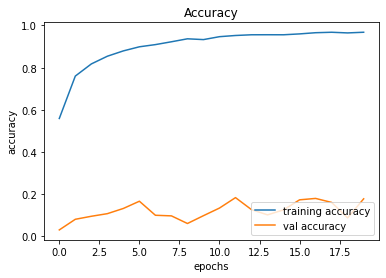

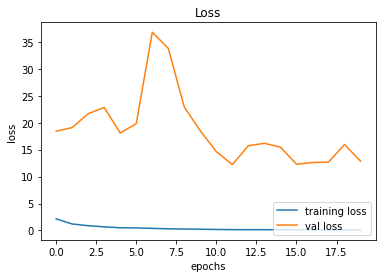

In [0]:
#Display of the accuracy and the loss values
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='lower right')

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='lower right')

In [0]:
#to test
y_test = to_categorical(y_test, 58)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2) 
print(test_acc)

NameError: ignored